In [3]:
import os
import sys
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skorch import NeuralNetClassifier
from skorch.callbacks import Checkpoint, EarlyStopping

import torch.nn as nn
import torch.optim as optim
sys.path.append(os.path.dirname(os.path.abspath(os.getcwd())) + "/..")
if os.getcwd().endswith("Topic2"):
    os.chdir("..")
    print(f"Changed to {os.getcwd()}")

from codebase import(
    IGNORE_RULES, 
    apply_ignore_rules,
    SktorchNN,
    age_col,
    transport_mode_col,
    categorical_cols,
    load_features_per_num,
    save_features_per_num,
    id_col,
    run_multiclass_classification
    )
from codebase.data.load_odin import load_odin
run_ML = False
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
odin_df = load_odin(dropna=True)

Loaded file from CSV
Loaded file from CSV
Loaded file from CSV
Loaded file from CSV
Loaded file from CSV


Now a classifier that classifies what mode of transport was used

In [5]:
age_range = (0, np.inf)
vehicles_to_include = [1, 7, 8, 9, ]
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")
df_less_vehicles = odin_df[odin_df[transport_mode_col].isin(vehicles_to_include)]
df_less_vehicles: pd.DataFrame = df_less_vehicles[(df_less_vehicles[age_col] < age_range[1]) & (df_less_vehicles[age_col] > age_range[0])]

Using device: cuda


Common labels: [0 1 2 3]
  epoch    train_loss    valid_acc    valid_loss    cp      dur
-------  ------------  -----------  ------------  ----  -------
      1        0.5626       0.7794        0.5347     +  36.2142
      2        0.5083       0.7860        0.5214     +  37.5825
      3        0.4973       0.7908        0.5123     +  37.7032
      4        0.4917       0.7917        0.5110     +  39.1550
      5        0.4863       0.7921        0.5111        39.0307
                      precision    recall  f1-score   support

       Passenger car       0.84      0.87      0.86     72043
    Electric bicycle       0.73      0.43      0.54     10436
Non-electric bicycle       0.70      0.75      0.73     34755
             On foot       0.78      0.77      0.78     35423

            accuracy                           0.79    152657
           macro avg       0.77      0.71      0.73    152657
        weighted avg       0.79      0.79      0.79    152657



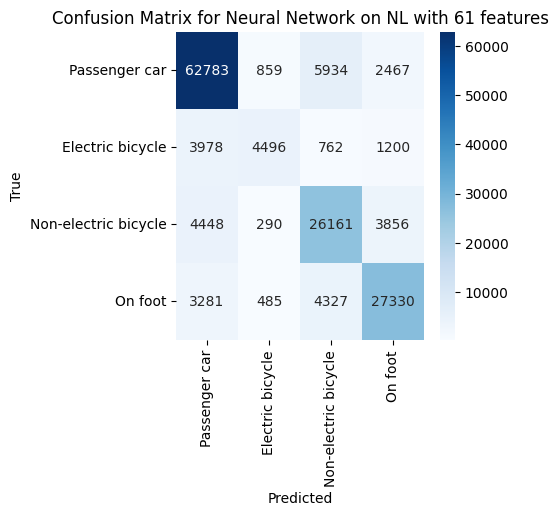

Accuracy of the neural network model with 61 features: 0.7911
Common labels: [0 1 2 3]
  epoch    train_loss    valid_acc    valid_loss    cp      dur
-------  ------------  -----------  ------------  ----  -------
      1        0.5631       0.7823        0.5297     +  36.0652
      2        0.5078       0.7878        0.5161     +  38.9541
      3        0.4970       0.7884        0.5134     +  39.5919
      4        0.4899       0.7917        0.5095     +  38.2820
      5        0.4854       0.7923        0.5095        38.0980
                      precision    recall  f1-score   support

       Passenger car       0.85      0.87      0.86     72043
    Electric bicycle       0.73      0.44      0.55     10436
Non-electric bicycle       0.69      0.76      0.73     34755
             On foot       0.79      0.77      0.78     35423

            accuracy                           0.79    152657
           macro avg       0.76      0.71      0.73    152657
        weighted avg       0.

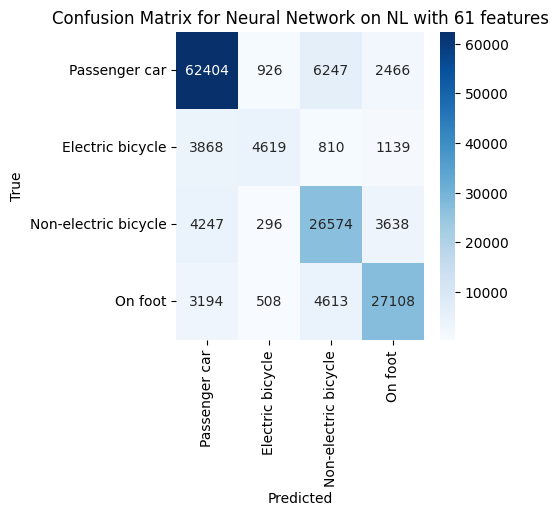

Accuracy of the neural network model with 61 features: 0.7907
Common labels: [0 1 2 3]
  epoch    train_loss    valid_acc    valid_loss    cp      dur
-------  ------------  -----------  ------------  ----  -------
      1        0.5597       0.7823        0.5304     +  34.4730
      2        0.5078       0.7867        0.5192     +  37.1064
      3        0.4980       0.7891        0.5137     +  38.4379
      4        0.4918       0.7908        0.5117     +  38.4276
      5        0.4871       0.7902        0.5125        38.1817
                      precision    recall  f1-score   support

       Passenger car       0.84      0.88      0.86     72043
    Electric bicycle       0.71      0.47      0.56     10436
Non-electric bicycle       0.69      0.77      0.73     34755
             On foot       0.82      0.74      0.77     35423

            accuracy                           0.79    152657
           macro avg       0.76      0.71      0.73    152657
        weighted avg       0.

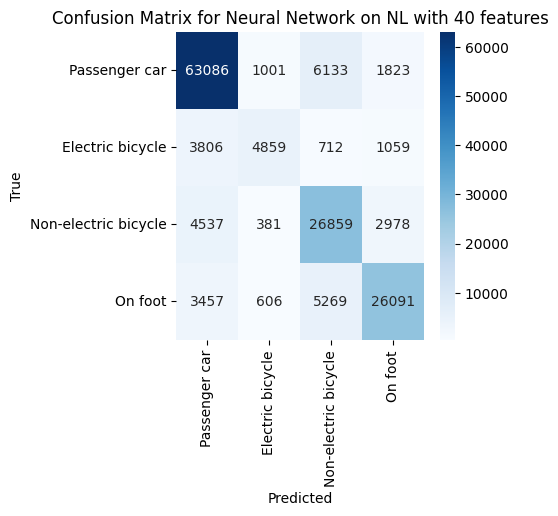

Accuracy of the neural network model with 40 features: 0.7919
Common labels: [0 1 2 3]
  epoch    train_loss    valid_acc    valid_loss    cp      dur
-------  ------------  -----------  ------------  ----  -------
      1        0.5627       0.7788        0.5359     +  34.5743
      2        0.5179       0.7844        0.5256     +  36.9451
      3        0.5097       0.7863        0.5228     +  37.2125
      4        0.5042       0.7865        0.5224     +  38.6959
      5        0.5000       0.7865        0.5239        37.0961
                      precision    recall  f1-score   support

       Passenger car       0.83      0.88      0.85     72043
    Electric bicycle       0.71      0.45      0.55     10436
Non-electric bicycle       0.70      0.75      0.72     34755
             On foot       0.81      0.74      0.77     35423

            accuracy                           0.79    152657
           macro avg       0.76      0.70      0.72    152657
        weighted avg       0.

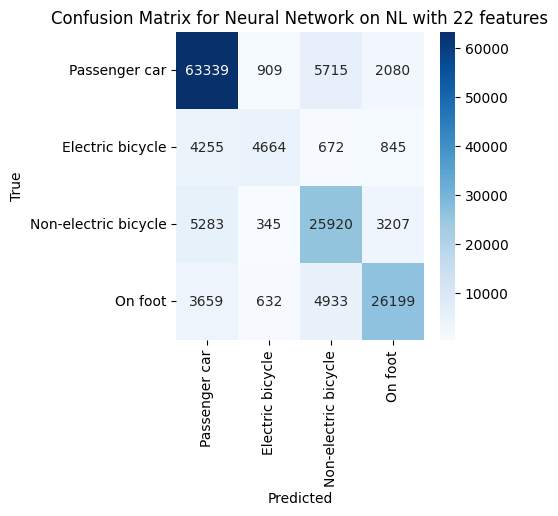

Accuracy of the neural network model with 22 features: 0.7869
Common labels: [0 1 2 3]
  epoch    train_loss    valid_acc    valid_loss    cp      dur
-------  ------------  -----------  ------------  ----  -------
      1        0.5585       0.7796        0.5404     +  35.0133
      2        0.5233       0.7840        0.5303     +  38.4033
      3        0.5181       0.7848        0.5277     +  37.6929
      4        0.5134       0.7866        0.5246     +  37.1636
      5        0.5105       0.7869        0.5253        37.4084
                      precision    recall  f1-score   support

       Passenger car       0.83      0.87      0.85     72043
    Electric bicycle       0.69      0.48      0.57     10436
Non-electric bicycle       0.70      0.74      0.72     34755
             On foot       0.80      0.74      0.77     35423

            accuracy                           0.79    152657
           macro avg       0.76      0.71      0.73    152657
        weighted avg       0.

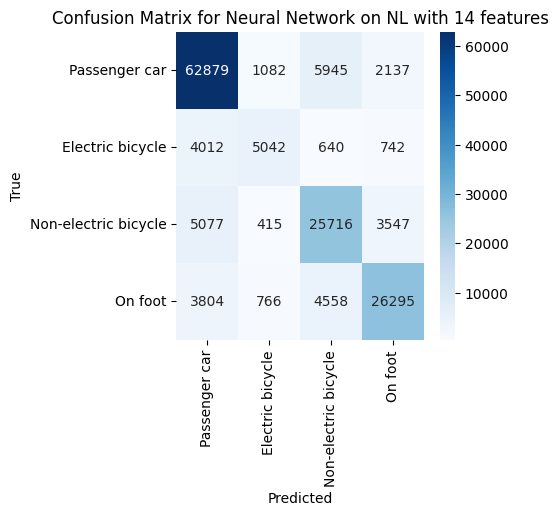

Accuracy of the neural network model with 14 features: 0.7856
Common labels: [0 1 2 3]
  epoch    train_loss    valid_acc    valid_loss    cp      dur
-------  ------------  -----------  ------------  ----  -------
      1        0.5626       0.7779        0.5443     +  35.7457
      2        0.5284       0.7821        0.5341     +  37.9490
      3        0.5241       0.7834        0.5321     +  38.2088
      4        0.5201       0.7850        0.5296     +  37.1882
      5        0.5179       0.7851        0.5273     +  38.4633
                      precision    recall  f1-score   support

       Passenger car       0.83      0.87      0.85     72043
    Electric bicycle       0.68      0.49      0.57     10436
Non-electric bicycle       0.70      0.74      0.72     34755
             On foot       0.81      0.74      0.77     35423

            accuracy                           0.78    152657
           macro avg       0.75      0.71      0.73    152657
        weighted avg       0.

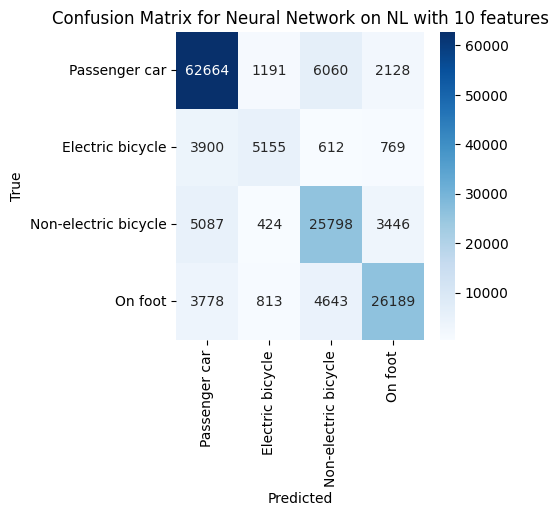

Accuracy of the neural network model with 10 features: 0.7848
Common labels: [0 1 2 3]
  epoch    train_loss    valid_acc    valid_loss    cp      dur
-------  ------------  -----------  ------------  ----  -------
      1        0.5592       0.7787        0.5423     +  37.0728
      2        0.5289       0.7828        0.5340     +  38.4483
      3        0.5245       0.7839        0.5305     +  38.6581
      4        0.5221       0.7852        0.5291     +  37.8391
      5        0.5206       0.7851        0.5280     +  37.6018
                      precision    recall  f1-score   support

       Passenger car       0.83      0.87      0.85     72043
    Electric bicycle       0.68      0.50      0.58     10436
Non-electric bicycle       0.70      0.74      0.72     34755
             On foot       0.81      0.74      0.77     35423

            accuracy                           0.78    152657
           macro avg       0.75      0.71      0.73    152657
        weighted avg       0.

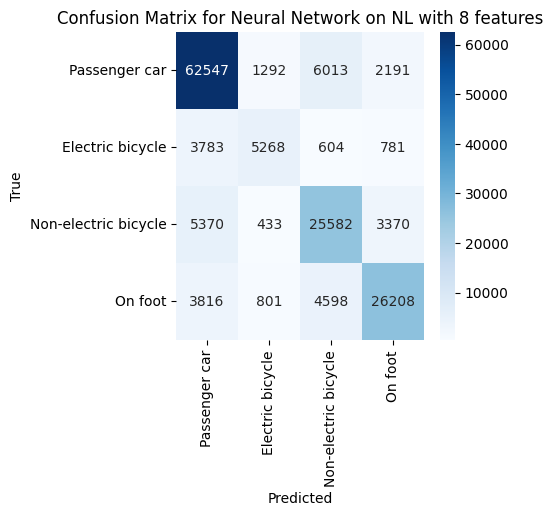

Accuracy of the neural network model with 8 features: 0.7835
Common labels: [0 1 2 3]
  epoch    train_loss    valid_acc    valid_loss    cp      dur
-------  ------------  -----------  ------------  ----  -------
      1        0.5988       0.7605        0.5858     +  37.4736
      2        0.5756       0.7675        0.5767     +  39.6781
      3        0.5728       0.7682        0.5748     +  39.2396
      4        0.5709       0.7686        0.5733     +  47.2840
      5        0.5699       0.7688        0.5724     +  48.1366
                      precision    recall  f1-score   support

       Passenger car       0.80      0.86      0.83     72043
    Electric bicycle       0.66      0.48      0.56     10436
Non-electric bicycle       0.69      0.72      0.70     34755
             On foot       0.80      0.72      0.75     35423

            accuracy                           0.77    152657
           macro avg       0.74      0.69      0.71    152657
        weighted avg       0.7

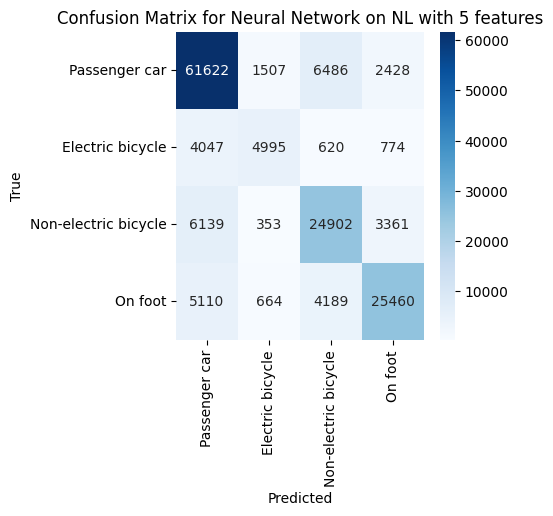

Accuracy of the neural network model with 5 features: 0.7663
Common labels: [0 1 2 3]
  epoch    train_loss    valid_acc    valid_loss    cp      dur
-------  ------------  -----------  ------------  ----  -------
      1        0.6539       0.7344        0.6269     +  39.2274
      2        0.5935       0.7458        0.6096     +  41.0360
      3        0.5824       0.7511        0.6064     +  40.3676
      4        0.5773       0.7549        0.5974     +  40.0728
      5        0.5745       0.7574        0.5947     +  38.8527
                      precision    recall  f1-score   support

       Passenger car       0.84      0.80      0.82     72043
    Electric bicycle       0.67      0.46      0.54     10436
Non-electric bicycle       0.69      0.67      0.68     34755
             On foot       0.67      0.83      0.74     35423

            accuracy                           0.75    152657
           macro avg       0.72      0.69      0.70    152657
        weighted avg       0.7

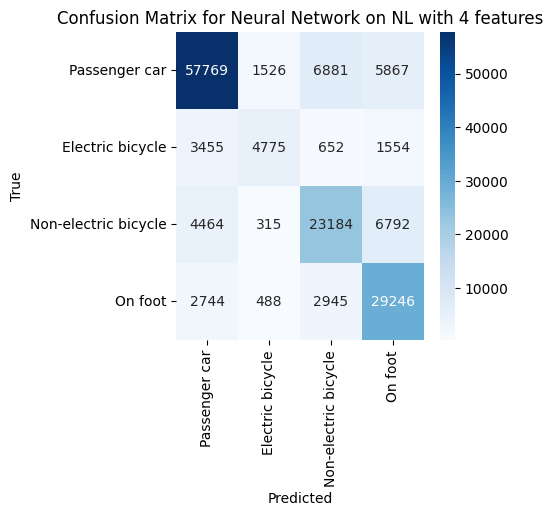

Accuracy of the neural network model with 4 features: 0.7532
Common labels: [0 1 2 3]
  epoch    train_loss    valid_acc    valid_loss    cp      dur
-------  ------------  -----------  ------------  ----  -------
      1        0.7962       0.6765        0.7686     +  37.7972
      2        0.7573       0.6824        0.7514     +  38.9141
      3        0.7493       0.6874        0.7397     +  40.5046
      4        0.7458       0.6908        0.7335     +  39.2693
      5        0.7436       0.6908        0.7318     +  40.2971
                      precision    recall  f1-score   support

       Passenger car       0.75      0.79      0.77     72043
    Electric bicycle       0.55      0.38      0.45     10436
Non-electric bicycle       0.62      0.67      0.65     34755
             On foot       0.60      0.55      0.57     35423

            accuracy                           0.68    152657
           macro avg       0.63      0.60      0.61    152657
        weighted avg       0.6

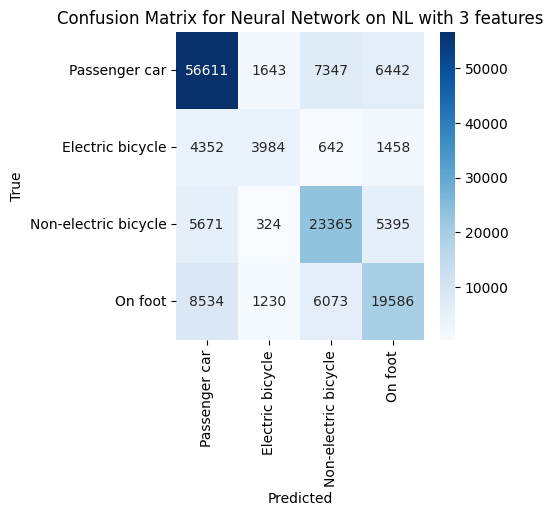

Accuracy of the neural network model with 3 features: 0.6783
Common labels: [0 1 2 3]
  epoch    train_loss    valid_acc    valid_loss    cp      dur
-------  ------------  -----------  ------------  ----  -------
      1        0.9131       0.6006        0.8695     +  37.6947
      2        0.8814       0.6059        0.8589     +  39.3829
      3        0.8774       0.6046        0.8646        39.3025
      4        0.8731       0.6086        0.8515     +  39.3638
      5        0.8720       0.6087        0.8542        38.8550
                      precision    recall  f1-score   support

       Passenger car       0.69      0.77      0.73     72043
    Electric bicycle       0.55      0.38      0.45     10436
Non-electric bicycle       0.42      0.32      0.36     34755
             On foot       0.53      0.56      0.55     35423

            accuracy                           0.59    152657
           macro avg       0.55      0.51      0.52    152657
        weighted avg       0.5

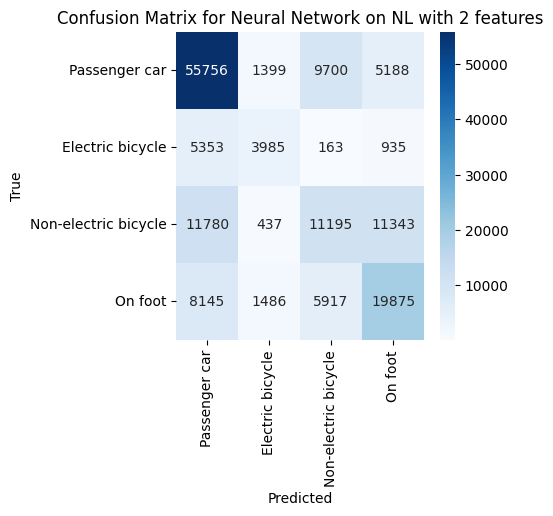

Accuracy of the neural network model with 2 features: 0.5949
Common labels: [0 1 2 3]
  epoch    train_loss    valid_acc    valid_loss    cp      dur
-------  ------------  -----------  ------------  ----  -------
      1        1.0829       0.4751        1.0908     +  36.9096
      2        1.0830       0.4751        1.0896     +  40.5290
      3        1.0798       0.4948        1.0887     +  39.3211
      4        1.0814       0.4948        1.0886     +  40.0697
      5        1.0821       0.4948        1.0885     +  39.5292


c:\Users\toell\Documents\GitHub\Design-of-AI-driven-business-operation\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\toell\Documents\GitHub\Design-of-AI-driven-business-operation\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\toell\Documents\GitHub\Design-of-AI-driven-business-operation\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_div

                      precision    recall  f1-score   support

       Passenger car       0.49      0.93      0.64     72043
    Electric bicycle       0.45      0.64      0.53     10436
Non-electric bicycle       0.00      0.00      0.00     34755
             On foot       0.00      0.00      0.00     35423

            accuracy                           0.48    152657
           macro avg       0.24      0.39      0.29    152657
        weighted avg       0.26      0.48      0.34    152657



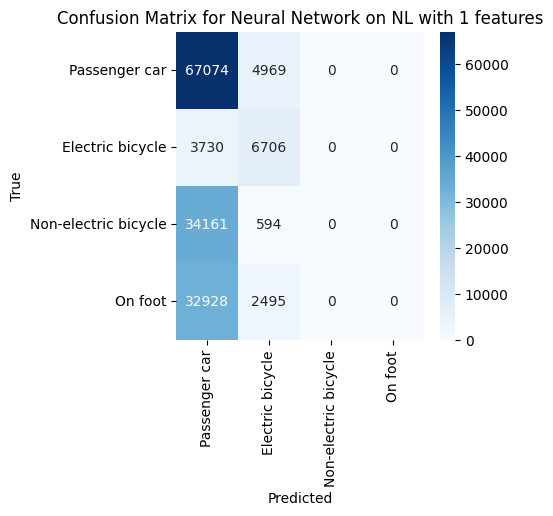

Accuracy of the neural network model with 1 features: 0.4833


In [ ]:
feature_savename = "data/features_per_num.pkl"
accs_savename = "data/accuracies_per_num_nn.pkl"

features_per_num, random_forest_accs = load_features_per_num()
y_translation = {val: order for order, val in enumerate(vehicles_to_include)}

lr = 0.001
output_dim=len(vehicles_to_include)
hidden_layers=[500, 200, 100]
max_epochs=5
accs = dict()
save_path = "neural_net_checkpoints"

for num, features in features_per_num.items():

    cols_to_include = features.index.to_list()
    # Align the columns with the DataFrame to make a correct count
    cols_to_include = [col for col in cols_to_include if col in df_less_vehicles.columns]

    checkpoint = Checkpoint(monitor='valid_loss_best', f_params=save_path + f'/best_model_{len(cols_to_include)}.pt')
    early_stopping = Checkpoint(monitor='valid_loss_best', f_patience=2, f_params=save_path + f'/best_model_{len(cols_to_include)}.pt')

    net = NeuralNetClassifier(
        SktorchNN(output_dim=output_dim, hidden_layers=hidden_layers),
        max_epochs=max_epochs,
        lr=lr,
        batch_size=32,
        optimizer=optim.Adam,
        criterion=nn.CrossEntropyLoss(),
        verbose=1,
        device=device,
        callbacks=[checkpoint, early_stopping],
    )

    pipeline_less, (X_train_less, X_test, y_test, y_pred), accuracy = run_multiclass_classification(
            df_less_vehicles,
            test_size=0.2,
            model=net,
            drop_cols=[col for col in df_less_vehicles.columns if col not in cols_to_include + [id_col, transport_mode_col]],
            categorical_features=categorical_cols,
            plot=True,
            savename=f"graphics/classification_results/multiclass/neural_net/less_vehicles_{len(cols_to_include)}",
            plot_title=f"Confusion Matrix for Neural Network on NL with {len(cols_to_include)} features",
            y_translation=y_translation,
        )

    print(f"Accuracy of the neural network model with {len(cols_to_include)} features: {accuracy:.4f}")
    accs[len(cols_to_include)] = accuracy
# Save the accuracies to a file
save_features_per_num(accuracies=accs, accs_savename=accs_savename)

In [ ]:
# Save the accuracies to a file
save_features_per_num(accuracies=accs, accs_savename=accs_savename)

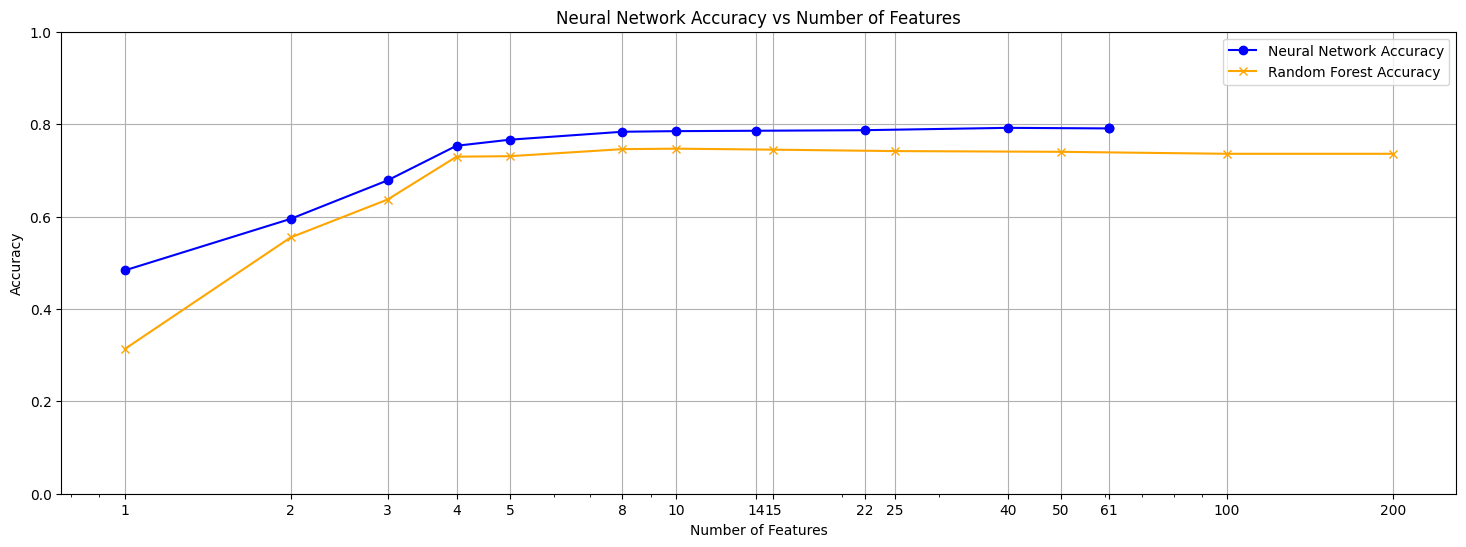

In [22]:
_, random_forest_accs = load_features_per_num()
# Did not save these correctly, takes 40 mins to run, so hardcoded for now
x_ticks_nn = [61, 61, 40, 22, 14, 10, 8, 5, 4, 3, 2, 1]
# plot the accuracies
plt.figure(figsize=(18, 6))
plt.plot(x_ticks_nn, list(accs.values()), marker='o', label='Neural Network Accuracy', color='blue')
plt.plot(list(accs.keys()), list(random_forest_accs), marker='x', label='Random Forest Accuracy', color='orange')
plt.title('Neural Network Accuracy vs Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.grid()
plt.ylim(0, 1)
plt.xscale('log')

all_ticks = sorted(set(list(accs.keys()) + x_ticks_nn))

plt.xticks(all_ticks, [str(x) for x in all_ticks], )
plt.legend()
plt.savefig("graphics/classification_results/multiclass/neural_net/accuracy_vs_num_features.png", bbox_inches='tight', dpi=300)
plt.show()